# Problem 1: Predicting Number of Attacks Next Month

## Checking pre prerequisites before starting to build the model

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme (style="darkgrid")


In [3]:
# Load the dataset
df = pd.read_csv("linear_regression_dataset.csv")

prob1_dataset = df

In [4]:
# Dropping any null values
prob1_dataset = prob1_dataset.dropna()

In [5]:
prob1_dataset['time_start'] = pd.to_datetime(prob1_dataset['time_start'])

# Extracting month and day from time star
prob1_dataset['month'] = prob1_dataset['time_start'].dt.month
prob1_dataset['day'] = prob1_dataset['time_start'].dt.day

# Now drop the datetime column
prob1_dataset.drop(columns=['time_start'], inplace=True)

/var/folders/cc/xzk8m4152gg0hn0wv4f7djc80000gn/T/ipykernel_80056/1254825405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob1_dataset['time_start'] = pd.to_datetime(prob1_dataset['time_start'])
/var/folders/cc/xzk8m4152gg0hn0wv4f7djc80000gn/T/ipykernel_80056/1254825405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob1_dataset['month'] = prob1_dataset['time_start'].dt.month
/var/folders/cc/xzk8m4152gg0hn0wv4f7djc80000gn/T/ipykernel_80056/1254825405.py:5: SettingWithCopyWarning: 
A value is tr

In [6]:
prob1_dataset.dtypes

launched               float64
destroyed              float64
model                   object
launched_next_month    float64
month                    int32
day                      int32
dtype: object

In [7]:
# One hot encoding the model column as it is an object dt which the model cannot read
prob1_dataset = pd.get_dummies(prob1_dataset, columns=['model'])


## Building the model

In [18]:
# Setting features and target
X = prob1_dataset.drop(columns=['launched_next_month'])
y = prob1_dataset['launched_next_month']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 31.93


## Switching to using the launched value instead in the model

In [20]:
# Setting features and target
X = prob1_dataset.drop(columns=['launched'])
y = prob1_dataset['launched']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 8.72


In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.908170508426249

In [24]:
y_mean = y.mean()
print('Average number of missiles launched next month',f"{y_mean:.2f}")  # Prints average number of missiles launched next month


Average number of missiles launched next month 13.88


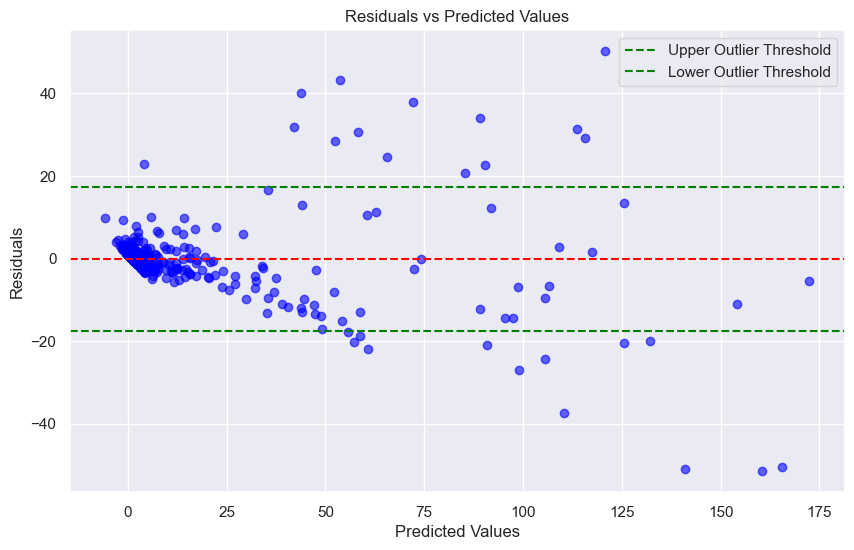

RMSE: 8.72


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.figure(figsize=(10, 6))

# Residuals vs Predicted values plot
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Optional: Add lines to identify outliers (this is one way to define outliers, e.g., beyond 2 standard deviations)
std_residuals = np.std(residuals)
outlier_threshold_upper = std_residuals * 2
outlier_threshold_lower = -std_residuals * 2

plt.axhline(y=outlier_threshold_upper, color='green', linestyle='--', label='Upper Outlier Threshold')
plt.axhline(y=outlier_threshold_lower, color='green', linestyle='--', label='Lower Outlier Threshold')

plt.legend()
plt.show()

# Print RMSE
print(f"RMSE: {rmse:.2f}")


Trying to use random forest for increased accuracy

In [13]:
prob1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2309 entries, 0 to 2320
Data columns (total 67 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   launched                                           2309 non-null   float64
 1   destroyed                                          2309 non-null   float64
 2   launched_next_month                                2309 non-null   float64
 3   month                                              2309 non-null   int32  
 4   day                                                2309 non-null   int32  
 5   model_3M22 Zircon                                  2309 non-null   bool   
 6   model_Aerial Bomb                                  2309 non-null   bool   
 7   model_Ballistic Missile                            2309 non-null   bool   
 8   model_C-300                                        2309 non-null   bool   
 9   model_C-300/C